<a id="top"></a>
# Project: Investigate Prosper loan dataset and find What factors affect a loan’s outcome status etc.


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#bivariate">bivariate Data Analysis</a></li> 
<li><a href="#multi">multivariate Data Analysis</a></li>
<li><a href="#summary">Key summary and insights</a></li>  
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
>**This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.**

>You can see the more details about each variable in our dataset below by clicking on the link:
https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0

In [1]:
# import relevent libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
#read in the data using pandas
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
# Lets us look at the shape of the data
print('The data contains {} rows and {} columns'.format(df.shape[0],df.shape[1]))

The data contains 113937 rows and 81 columns


In [4]:
# Let us investigate further for missing values and the data types of the variables in our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

From the result above we can see we have some missing data

### since we won't be needing all the variables for our analysis, let us take the columns we need

In [5]:
# Due to many variables in this dataset, I only use few variables. Those are:  
cols = ['Term' , 
        'LoanStatus', 
        'EstimatedEffectiveYield' ,  
        'BorrowerAPR' , 
        'BorrowerRate' , 
        'ProsperRating (numeric)',
        'ProsperRating (Alpha)',
        'ProsperScore',                     
        'ListingCategory (numeric)', 
        'EmploymentStatus',
        'Occupation', 
        'EmploymentStatusDuration', 
        'IsBorrowerHomeowner', 
        'IncomeVerifiable', 
        'StatedMonthlyIncome', 
        'MonthlyLoanPayment',
        'Recommendations', 
        'DebtToIncomeRatio',
        'LoanOriginalAmount' ,
        'PercentFunded',
        'IncomeRange',
        'Investors',
        'BorrowerState']

In [6]:
# save the selected column on a new dataframe
loan_df = df[cols]
loan_df.head()

,Term,LoanStatus,EstimatedEffectiveYield,BorrowerAPR,BorrowerRate,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),EmploymentStatus,...,IncomeVerifiable,StatedMonthlyIncome,MonthlyLoanPayment,Recommendations,DebtToIncomeRatio,LoanOriginalAmount,PercentFunded,IncomeRange,Investors,BorrowerState
0,36,Completed,NaN,0.16516,0.1580,NaN,NaN,NaN,0,Self-employed,...,True,3083.333333,330.43,0,0.17,9425,1.0,"$25,000-49,999",258,CO
1,36,Current,0.07960,0.12016,0.0920,6.0,A,7.0,2,Employed,...,True,6125.000000,318.93,0,0.18,10000,1.0,"$50,000-74,999",1,CO
2,36,Completed,NaN,0.28269,0.2750,NaN,NaN,NaN,0,Not available,...,True,2083.333333,123.32,0,0.06,3001,1.0,Not displayed,41,GA
3,36,Current,0.08490,0.12528,0.0974,6.0,A,9.0,16,Employed,...,True,2875.000000,321.45,0,0.15,10000,1.0,"$25,000-49,999",158,GA
4,36,Current,0.18316,0.24614,0.2085,3.0,D,4.0,2,Employed,...,True,9583.333333,563.97,0,0.26,15000,1.0,"$100,000+",20,MN


In [7]:
# let us look at our new data again
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Term                       113937 non-null  int64  
 1   LoanStatus                 113937 non-null  object 
 2   EstimatedEffectiveYield    84853 non-null   float64
 3   BorrowerAPR                113912 non-null  float64
 4   BorrowerRate               113937 non-null  float64
 5   ProsperRating (numeric)    84853 non-null   float64
 6   ProsperRating (Alpha)      84853 non-null   object 
 7   ProsperScore               84853 non-null   float64
 8   ListingCategory (numeric)  113937 non-null  int64  
 9   EmploymentStatus           111682 non-null  object 
 10  Occupation                 110349 non-null  object 
 11  EmploymentStatusDuration   106312 non-null  float64
 12  IsBorrowerHomeowner        113937 non-null  bool   
 13  IncomeVerifiable           11

In [8]:
#check for missing values
(loan_df.isnull()).sum()

Term                             0
LoanStatus                       0
EstimatedEffectiveYield      29084
BorrowerAPR                     25
BorrowerRate                     0
ProsperRating (numeric)      29084
ProsperRating (Alpha)        29084
ProsperScore                 29084
ListingCategory (numeric)        0
EmploymentStatus              2255
Occupation                    3588
EmploymentStatusDuration      7625
IsBorrowerHomeowner              0
IncomeVerifiable                 0
StatedMonthlyIncome              0
MonthlyLoanPayment               0
Recommendations                  0
DebtToIncomeRatio             8554
LoanOriginalAmount               0
PercentFunded                    0
IncomeRange                      0
Investors                        0
BorrowerState                 5515
dtype: int64

<a id='wrangling'></a>
## Data Wrangling

In [9]:
#drop null values
loan_df.dropna(inplace=True)
loan_df.isnull().sum()

c:\users\hp 7240\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Term                         0
LoanStatus                   0
EstimatedEffectiveYield      0
BorrowerAPR                  0
BorrowerRate                 0
ProsperRating (numeric)      0
ProsperRating (Alpha)        0
ProsperScore                 0
ListingCategory (numeric)    0
EmploymentStatus             0
Occupation                   0
EmploymentStatusDuration     0
IsBorrowerHomeowner          0
IncomeVerifiable             0
StatedMonthlyIncome          0
MonthlyLoanPayment           0
Recommendations              0
DebtToIncomeRatio            0
LoanOriginalAmount           0
PercentFunded                0
IncomeRange                  0
Investors                    0
BorrowerState                0
dtype: int64

In [10]:
# Check for duplicates, Returns 0 if there is no duplicates
loan_df.duplicated().sum()

0

In [11]:
# let us look as some descriptive statistics of numeric non null columns in our data
loan_df.describe()

,Term,EstimatedEffectiveYield,BorrowerAPR,BorrowerRate,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,StatedMonthlyIncome,MonthlyLoanPayment,Recommendations,DebtToIncomeRatio,LoanOriginalAmount,PercentFunded,Investors
count,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000
mean,42.760470,0.166738,0.223901,0.193621,4.132413,6.080246,3.302259,104.578028,6002.833586,296.421859,0.016571,0.258032,9294.999410,0.998131,69.998517
std,11.744005,0.067595,0.079372,0.074088,1.661460,2.360640,4.396670,95.836443,5110.743506,189.674943,0.187732,0.320587,6413.404265,0.020572,97.801415
min,12.000000,-0.181600,0.045830,0.040000,1.000000,1.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,1000.000000,0.700000,1.000000
25%,36.000000,0.114800,0.161570,0.134900,3.000000,4.000000,1.000000,32.000000,3583.333333,159.062500,0.000000,0.150000,4000.000000,1.000000,1.000000
50%,36.000000,0.157670,0.215660,0.184500,4.000000,6.000000,1.000000,76.000000,5041.666667,257.760000,0.000000,0.220000,8000.000000,1.000000,32.000000
75%,60.000000,0.219000,0.287800,0.254900,5.000000,8.000000,3.000000,150.000000,7250.000000,392.420000,0.000000,0.320000,14603.250000,1.000000,100.000000
max,60.000000,0.319900,0.423950,0.360000,7.000000,11.000000,20.000000,755.000000,483333.333333,2251.510000,19.000000,10.010000,35000.000000,1.012500,1189.000000


In [12]:
# rename some columns to make it consistent
loan_df.rename(columns={'ProsperRating (Alpha)': 'ProsperRatingAlpha', 
                        'ProsperRating (numeric)': 'ProsperRatingNumeric',
                        'ListingCategory (numeric)' : 'ListingCategoryNumeric'
                       }, inplace=True)

c:\users\hp 7240\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [13]:
# lower case all variable names
loan_df.columns = loan_df.columns.str.replace('[\W]', '')\
          .str.replace('(?<!^)([A-Z])', r'_\1')\
          .str.lower()

In [14]:
loan_df.columns

Index(['term', 'loan_status', 'estimated_effective_yield', 'borrower_a_p_r',
       'borrower_rate', 'prosper_rating_numeric', 'prosper_rating_alpha',
       'prosper_score', 'listing_category_numeric', 'employment_status',
       'occupation', 'employment_status_duration', 'is_borrower_homeowner',
       'income_verifiable', 'stated_monthly_income', 'monthly_loan_payment',
       'recommendations', 'debt_to_income_ratio', 'loan_original_amount',
       'percent_funded', 'income_range', 'investors', 'borrower_state'],
      dtype='object')

In [15]:
# term column looks like a categorical variable misinterpreted as an integer
loan_df.term.value_counts()

36    51919
60    22883
12     1414
Name: term, dtype: int64

In [16]:
#convert term to  categorical variable
loan_df['term']= loan_df.term.astype('category')

c:\users\hp 7240\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
loan_df.dtypes

term                          category
loan_status                     object
estimated_effective_yield      float64
borrower_a_p_r                 float64
borrower_rate                  float64
prosper_rating_numeric         float64
prosper_rating_alpha            object
prosper_score                  float64
listing_category_numeric         int64
employment_status               object
occupation                      object
employment_status_duration     float64
is_borrower_homeowner             bool
income_verifiable                 bool
stated_monthly_income          float64
monthly_loan_payment           float64
recommendations                  int64
debt_to_income_ratio           float64
loan_original_amount             int64
percent_funded                 float64
income_range                    object
investors                        int64
borrower_state                  object
dtype: object

###  Objectives of the analysis
> So far we were able to look at the structure of our data and we found out it had 113,937 loans with 81 variables on each loan, which inludes variables like loan amount, borrower rate (or interest rate), current loan status, borrower income etc.

>I will be very much concise on figuring the factors that predicts loan outcome in the dataset for simplicity. So i will be working with a few variable that helps me do that.

**Features that will aid my analysis**
- i think features like `background of the borrower, occupation, employment status, income rating and verifiability , whether he is homeowner or not and prosper rating` will have a huge impact on loan outcome status so will be focusing on these columns more

<a id='eda'></a>
## Exploratory Data Analysis

>### Univariate Analysis

In [18]:
#First let us split our columns into categorical and numeric
loan_cat = loan_df.loc[:, (loan_df.dtypes =='object') | (loan_df.dtypes =='category')]
loan_cat

,term,loan_status,prosper_rating_alpha,employment_status,occupation,income_range,borrower_state
1,36,Current,A,Employed,Professional,"$50,000-74,999",CO
3,36,Current,A,Employed,Skilled Labor,"$25,000-49,999",GA
4,36,Current,D,Employed,Executive,"$100,000+",MN
5,60,Current,B,Employed,Professional,"$100,000+",NM
6,36,Current,E,Employed,Sales - Retail,"$25,000-49,999",KS
...,...,...,...,...,...,...,...
113932,36,Current,C,Employed,Food Service Management,"$50,000-74,999",IL
113933,36,FinalPaymentInProgress,A,Employed,Professional,"$75,000-99,999",PA
113934,60,Current,D,Employed,Other,"$25,000-49,999",TX
113935,60,Completed,C,Full-time,Food Service,"$25,000-49,999",GA


In [19]:
loan_num = loan_df.loc[:, (loan_df.dtypes ==np.int64) | (loan_df.dtypes ==np.float64)]
loan_num

,estimated_effective_yield,borrower_a_p_r,borrower_rate,prosper_rating_numeric,prosper_score,listing_category_numeric,employment_status_duration,stated_monthly_income,monthly_loan_payment,recommendations,debt_to_income_ratio,loan_original_amount,percent_funded,investors
1,0.07960,0.12016,0.0920,6.0,7.0,2,44.0,6125.000000,318.93,0,0.18,10000,1.0,1
3,0.08490,0.12528,0.0974,6.0,9.0,16,113.0,2875.000000,321.45,0,0.15,10000,1.0,158
4,0.18316,0.24614,0.2085,3.0,4.0,2,44.0,9583.333333,563.97,0,0.26,15000,1.0,20
5,0.11567,0.15425,0.1314,5.0,10.0,1,82.0,8333.333333,342.37,0,0.36,15000,1.0,1
6,0.23820,0.31032,0.2712,2.0,2.0,1,172.0,2083.333333,122.67,0,0.27,3000,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,0.16490,0.22354,0.1864,4.0,5.0,1,246.0,4333.333333,364.74,0,0.13,10000,1.0,1
113933,0.10070,0.13220,0.1110,6.0,8.0,7,21.0,8041.666667,65.57,0,0.11,2000,1.0,22
113934,0.18828,0.23984,0.2150,3.0,3.0,1,84.0,2875.000000,273.35,0,0.51,10000,1.0,119
113935,0.24450,0.28408,0.2605,4.0,5.0,2,94.0,3875.000000,449.55,0,0.48,15000,1.0,274


In [20]:
loan_cat['prosper_rating_alpha'].value_counts()

C     16499
B     14379
A     13490
D     12629
E      8443
HR     5680
AA     5096
Name: prosper_rating_alpha, dtype: int64

c:\users\hp 7240\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
c:\users\hp 7240\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Text(0.5, 1.0, 'Applicants prosper rating count')

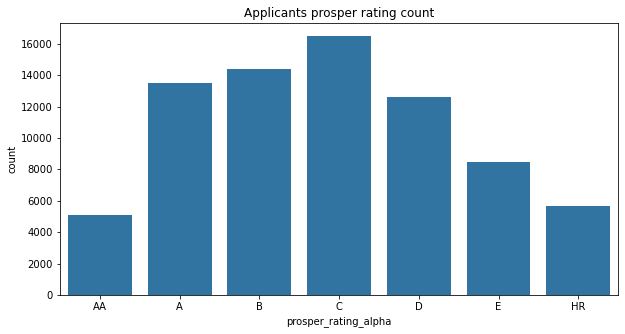

In [21]:
# From above it seems the order has to be maintained becuase this is an ordinal variable
prosper_rating_alpha_classes = ['AA','A', 'B', 'C', 'D', 'E', 'HR']
IncomeRange_classes = ['$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
pd_ver = pd.__version__.split(".")
if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
    vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = prosper_rating_alpha_classes)
    loan_df['prosper_rating_alpha'] = loan_df['prosper_rating_alpha'].astype(vclasses)
    vclasses_1 = pd.api.types.CategoricalDtype(ordered = True, categories = IncomeRange_classes)
    loan_df['income_range'] = loan_df['income_range'].astype(vclasses_1)
else: # compatibility for v.20
    loan_df['prosper_rating_alpha'] = loan_df['prosper_rating_alpha'].astype('category', ordered = True,
                                                     categories = ProsperRating_Alpha_classes)
    loan_df['income_range'] = loan_df['income_range'].astype('category', ordered = True,
                                                     categories = IncomeRange_classes)

plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[0]
sb.countplot(data = loan_df, x = 'prosper_rating_alpha', color = base_color);
plt.title('Applicants prosper rating count')

Text(0.5, 1.0, 'Applicants income range count')

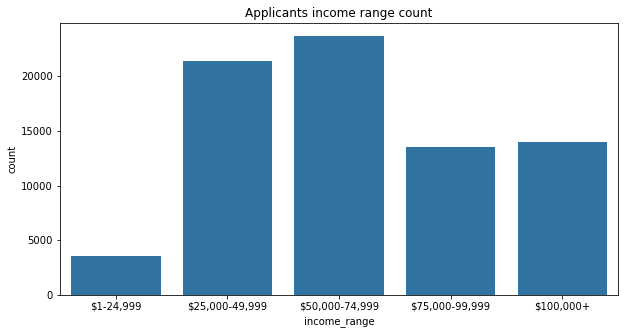

In [22]:
plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[0]
sb.countplot(data = loan_df, x = 'income_range', color = base_color);
plt.title('Applicants income range count')

In [23]:
loan_num.listing_category_numeric.value_counts()

1     48604
7      8280
2      6328
3      3644
6      2032
13     1767
15     1382
14      795
18      783
20      729
19      712
16      289
11      201
5       201
8       191
9        83
10       82
17       49
12       45
0        19
Name: listing_category_numeric, dtype: int64

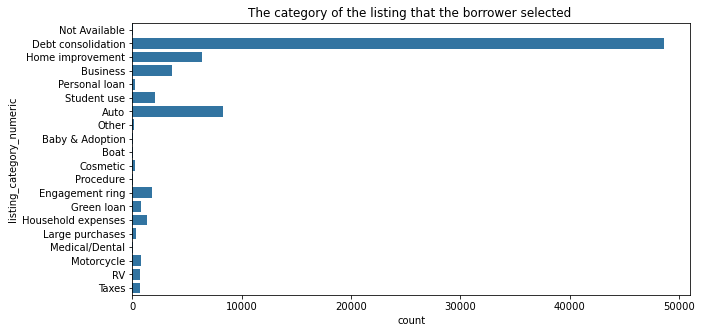

In [24]:

# ListingCategory_Numeric
plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[0]
plt.title("The category of the listing that the borrower selected ")
ax = sb.countplot(data = loan_df, y = 'listing_category_numeric', color = base_color,
             );
ax.set(yticklabels = ['Not Available','Debt consolidation','Home improvement','Business','Personal loan','Student use','Auto',
                     'Other','Baby & Adoption','Boat','Cosmetic','Procedure','Engagement ring',
                     'Green loan','Household expenses','Large purchases','Medical/Dental','Motorcycle','RV','Taxes',
                     'Vacation','Wedding loan']);

In [25]:
loan_df.columns

Index(['term', 'loan_status', 'estimated_effective_yield', 'borrower_a_p_r',
       'borrower_rate', 'prosper_rating_numeric', 'prosper_rating_alpha',
       'prosper_score', 'listing_category_numeric', 'employment_status',
       'occupation', 'employment_status_duration', 'is_borrower_homeowner',
       'income_verifiable', 'stated_monthly_income', 'monthly_loan_payment',
       'recommendations', 'debt_to_income_ratio', 'loan_original_amount',
       'percent_funded', 'income_range', 'investors', 'borrower_state'],
      dtype='object')

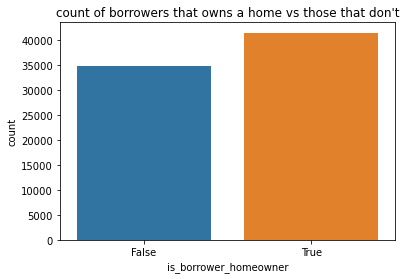

In [26]:
# How many borrowers owns a home
plt.title("count of borrowers that owns a home vs those that don't")
sb.countplot(loan_df.is_borrower_homeowner)

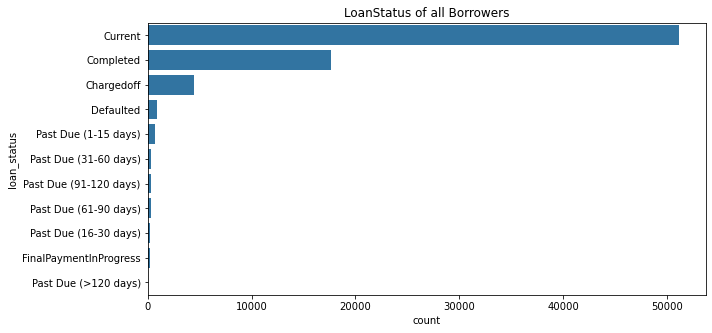

In [27]:
#Loan status
plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[0]
plt.title("LoanStatus of all Borrowers")
sb.countplot(data = loan_df, y = 'loan_status', color = base_color,
             order = loan_df['loan_status'].value_counts().index);

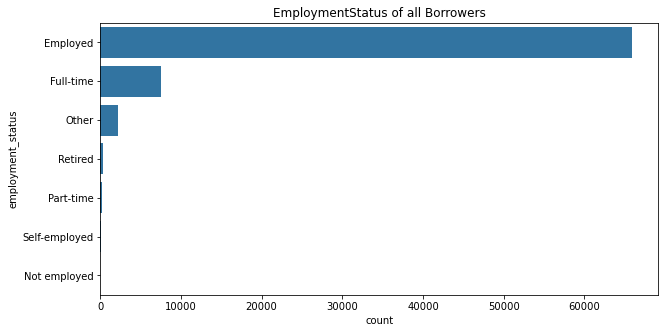

In [28]:
# 'EmploymentStatus'
plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[0]
plt.title("EmploymentStatus of all Borrowers")
sb.countplot(data = loan_df, y = 'employment_status', color = base_color,
             order = loan_df['employment_status'].value_counts().index);

In [29]:
#borrowers state
loan_df.borrower_state.value_counts().index

Index(['CA', 'NY', 'TX', 'FL', 'IL', 'OH', 'GA', 'VA', 'NJ', 'PA', 'MI', 'NC',
       'MD', 'WA', 'MA', 'MO', 'MN', 'CO', 'IN', 'TN', 'CT', 'WI', 'AZ', 'AL',
       'OR', 'NV', 'SC', 'KY', 'KS', 'LA', 'AR', 'OK', 'MS', 'NE', 'UT', 'NH',
       'RI', 'ID', 'DC', 'HI', 'NM', 'WV', 'DE', 'MT', 'SD', 'VT', 'AK', 'WY'],
      dtype='object')

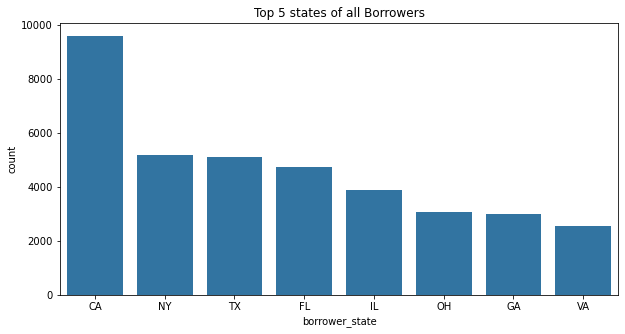

In [30]:
#borrowers state
plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[0]
sb.countplot(data = loan_df, x = 'borrower_state', color = base_color,
             order = loan_df['borrower_state'].value_counts().head(8).index );
plt.title("Top 5 states of all Borrowers");

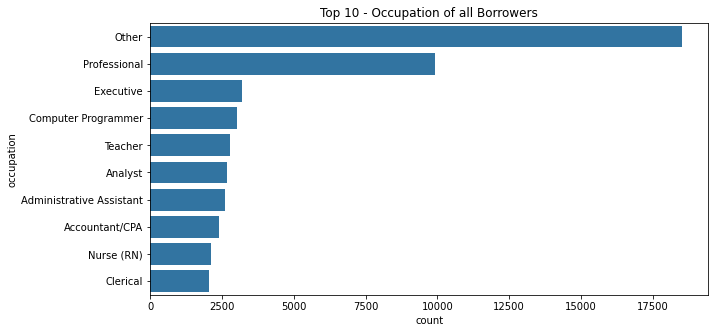

In [31]:
#'Occupation'
plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[0]
sb.countplot(data = loan_df, y = 'occupation', color = base_color,
             order = loan_df['occupation'].value_counts().head(10).index );
plt.title("Top 10 - Occupation of all Borrowers");

In [32]:
#'prosper score'
loan_df.prosper_score.value_counts()

8.0     11432
6.0     11156
4.0     10826
7.0      9816
5.0      8643
9.0      6588
3.0      6374
2.0      4674
10.0     4600
11.0     1392
1.0       715
Name: prosper_score, dtype: int64

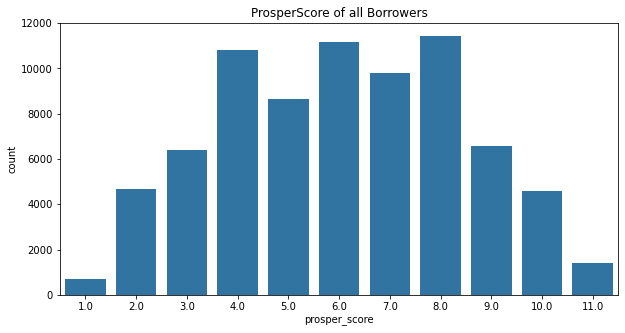

In [33]:

plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[0]
sb.countplot(data = loan_df, x = 'prosper_score', color = base_color);
plt.title("ProsperScore of all Borrowers");

## insights gained from my univariate visuals for categorical variables
- the largest percentage of borrowers have a prosper score rating of 8.0, 6.0 and 4.0
- majority of borrowers are without a known occupation.
- majority of borrowers are from CA(California) and NY(New York)
- majority of the borrowers are employed
- great proportion of loan is still current
- only few borrowers earn less than `$25,000` with the majority earning between `$50,000` - `$74,999`
- majority of borrowers owns a home

**Now let's plot some visuals for the numeric variables**

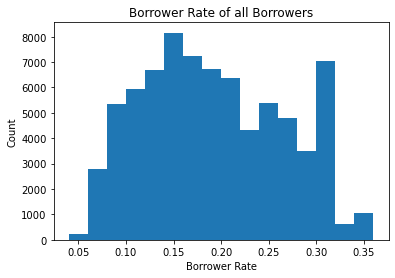

In [34]:
#borrower rate
bin_edges = np.arange(loan_df['borrower_rate'].min(), loan_df['borrower_rate'].max()+.02,0.02)
plt.hist(data = loan_df, x = 'borrower_rate',bins=bin_edges);
plt.xlabel('Borrower Rate');
plt.ylabel('Count');
plt.title("Borrower Rate of all Borrowers");

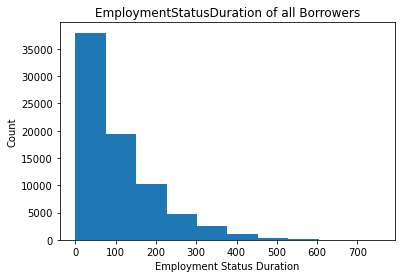

In [35]:
#employment status duration
plt.hist(data = loan_df, x = 'employment_status_duration');
plt.xlabel('Employment Status Duration');
plt.ylabel('Count');
plt.title("EmploymentStatusDuration of all Borrowers");


In [36]:
#stated monthly income
loan_df.stated_monthly_income.max()

483333.333333

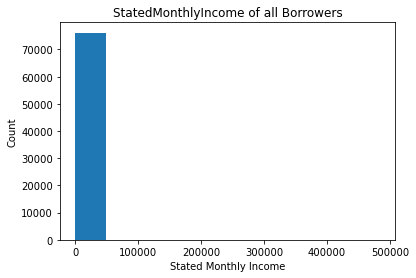

In [37]:
#bin_edges = np.arange(loan_df['stated_monthly_income'].min(), loan_df['stated_monthly_income'].max(),10)

plt.hist(data = loan_df, x = 'stated_monthly_income');
plt.xlabel('Stated Monthly Income');
plt.ylabel('Count');
plt.title("StatedMonthlyIncome of all Borrowers");

In [38]:
# monthly_income = []
# for _ in range(10000):
#     sample = loan_df.sample(loan_df.shape[0],replace=True)
#     month_inc = sample.stated_monthly_income.mean()
#     monthly_income.append(month_inc)
# plt.hist(monthly_income);

In [39]:
#np.array(monthly_income).mean()

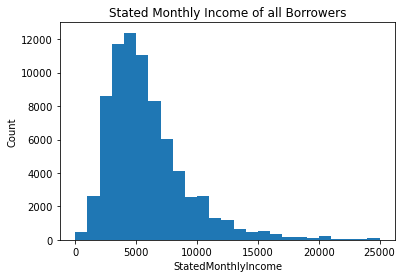

In [40]:
loan_df_sub = loan_df[loan_df['stated_monthly_income'] <= 25000]
bin_edges = np.arange(0, loan_df_sub['stated_monthly_income'].max()+1000, 1000)
plt.hist(data = loan_df, x = 'stated_monthly_income', bins = bin_edges);
plt.xlabel('StatedMonthlyIncome');
plt.ylabel('Count');
plt.title("Stated Monthly Income of all Borrowers");


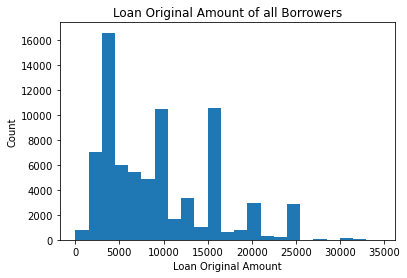

In [41]:
#Loan original amount
bin_edges = np.arange(0, loan_df['loan_original_amount'].max()+1000, 1500)
plt.hist(data =loan_df, x = 'loan_original_amount', bins = bin_edges)
plt.xlabel('Loan Original Amount')
plt.ylabel('Count');
plt.title("Loan Original Amount of all Borrowers");

In [42]:
loan_df['investors'].describe()

count    76216.000000
mean        69.998517
std         97.801415
min          1.000000
25%          1.000000
50%         32.000000
75%        100.000000
max       1189.000000
Name: investors, dtype: float64

c:\users\hp 7240\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':
c:\users\hp 7240\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


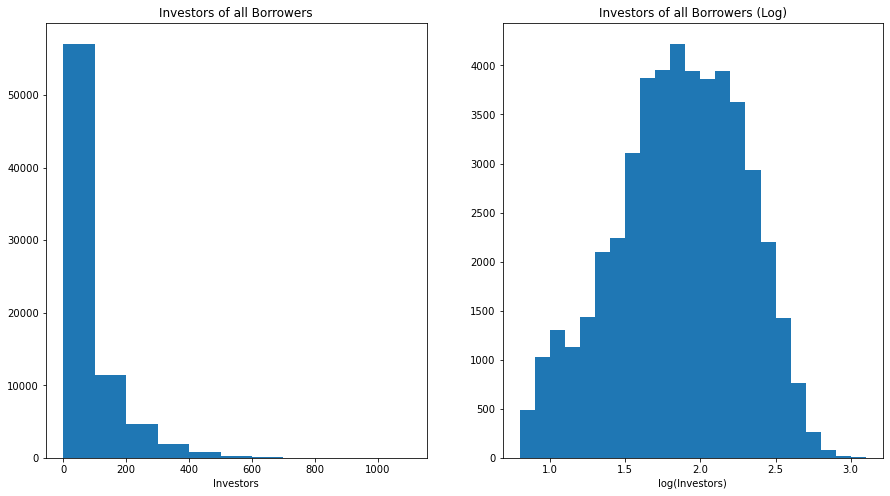

In [43]:

plt.figure(figsize = [15, 8])

# left histogram: data plotted in natural units
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, loan_df['investors'].max()+10, 100)
plt.hist(data =loan_df, x = 'investors', bins = bin_edges)
plt.xlabel('Investors')
plt.title("Investors of all Borrowers");

# right histogram: data plotted after direct log transformation
plt.subplot(1, 2, 2)
plt.subplot(1, 2, 2)
log_data = np.log10(loan_df['investors']) # direct data transform
log_bin_edges = np.arange(0.8, log_data.max()+0.1, 0.1)
plt.hist(log_data, bins = log_bin_edges)
plt.xlabel('log(Investors)')
plt.title("Investors of all Borrowers (Log)");
loan_df['investors_log'] = np.log10(loan_df['investors'])

## Quick insight from the univariate numerical variable


- **investors**: the number of investors for one loan was majored at 100.
- **Loan_original_amount:** the distribution of the loan origin amount was massively  skewed to the right. with its highest peak between 4000-5000 USD
- **Stated_monthly_income**: Since a wealthy person isn't expected to go borrowing, as expected the distribution of `stated monthly income` by borrowers is skilled to the right. with majority earning below 100 USD monthly 
- **borrower_rate:** This is a unimodal distribution with its mode around 15 - 16 percent.

<a id="bivariate"></a>
## Bivariate Exploration
> Visuals between two numerical variables

In [44]:
loan_num.dtypes

estimated_effective_yield     float64
borrower_a_p_r                float64
borrower_rate                 float64
prosper_rating_numeric        float64
prosper_score                 float64
listing_category_numeric        int64
employment_status_duration    float64
stated_monthly_income         float64
monthly_loan_payment          float64
recommendations                 int64
debt_to_income_ratio          float64
loan_original_amount            int64
percent_funded                float64
investors                       int64
dtype: object

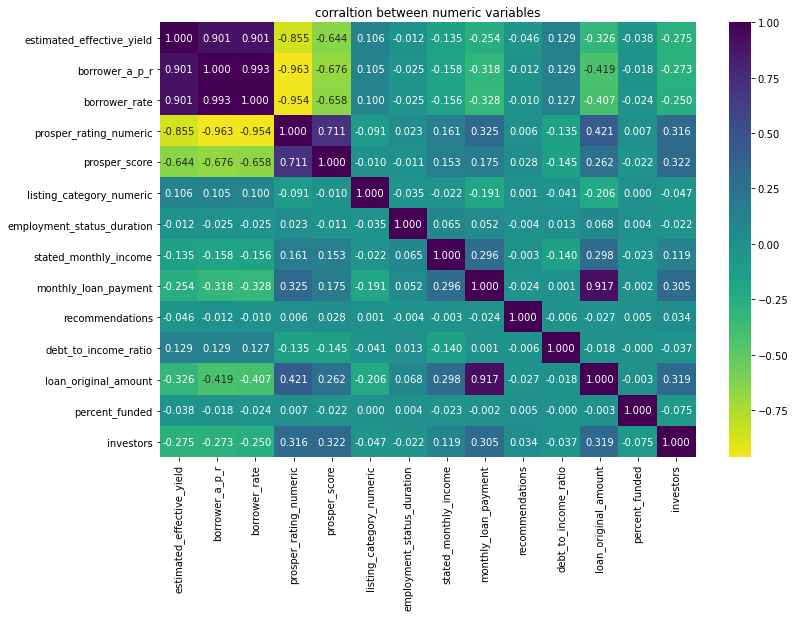

In [45]:
# correlation plot
plt.figure(figsize = [12, 8])
sb.heatmap(loan_num.corr(), annot = True, fmt = '.3f',
           cmap = 'viridis_r', center = 0)
plt.title('corraltion between numeric variables')
plt.show()

In [46]:
loan_num.corr()

,estimated_effective_yield,borrower_a_p_r,borrower_rate,prosper_rating_numeric,prosper_score,listing_category_numeric,employment_status_duration,stated_monthly_income,monthly_loan_payment,recommendations,debt_to_income_ratio,loan_original_amount,percent_funded,investors
estimated_effective_yield,1.000000,0.901118,0.900550,-0.855330,-0.643770,0.105553,-0.011521,-0.135050,-0.253730,-0.046152,0.128576,-0.325863,-0.037511,-0.275325
borrower_a_p_r,0.901118,1.000000,0.993423,-0.962509,-0.675986,0.105126,-0.024559,-0.157873,-0.318303,-0.012437,0.128925,-0.419452,-0.018218,-0.272977
borrower_rate,0.900550,0.993423,1.000000,-0.953535,-0.658320,0.099626,-0.024511,-0.156327,-0.327766,-0.009918,0.126664,-0.406860,-0.024070,-0.250044
prosper_rating_numeric,-0.855330,-0.962509,-0.953535,1.000000,0.711403,-0.090825,0.022553,0.160684,0.325014,0.005585,-0.135045,0.420734,0.007148,0.315670
prosper_score,-0.643770,-0.675986,-0.658320,0.711403,1.000000,-0.010014,-0.011231,0.153254,0.174995,0.027790,-0.145160,0.261788,-0.022125,0.322177
listing_category_numeric,0.105553,0.105126,0.099626,-0.090825,-0.010014,1.000000,-0.035075,-0.022433,-0.190985,0.000544,-0.040891,-0.205904,0.000116,-0.047346
employment_status_duration,-0.011521,-0.024559,-0.024511,0.022553,-0.011231,-0.035075,1.000000,0.064777,0.051922,-0.004436,0.012631,0.067834,0.004165,-0.021868
stated_monthly_income,-0.135050,-0.157873,-0.156327,0.160684,0.153254,-0.022433,0.064777,1.000000,0.296397,-0.002793,-0.140016,0.297821,-0.022844,0.119387
monthly_loan_payment,-0.253730,-0.318303,-0.327766,0.325014,0.174995,-0.190985,0.051922,0.296397,1.000000,-0.023510,0.000630,0.917267,-0.002312,0.305466
recommendations,-0.046152,-0.012437,-0.009918,0.005585,0.027790,0.000544,-0.004436,-0.002793,-0.023510,1.000000,-0.005630,-0.027016,0.004575,0.033610


## Relationship between numeric & categorical variables

**how does employment status and prosper rating affect loan amount**

c:\users\hp 7240\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:1264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 720x576 with 0 Axes>

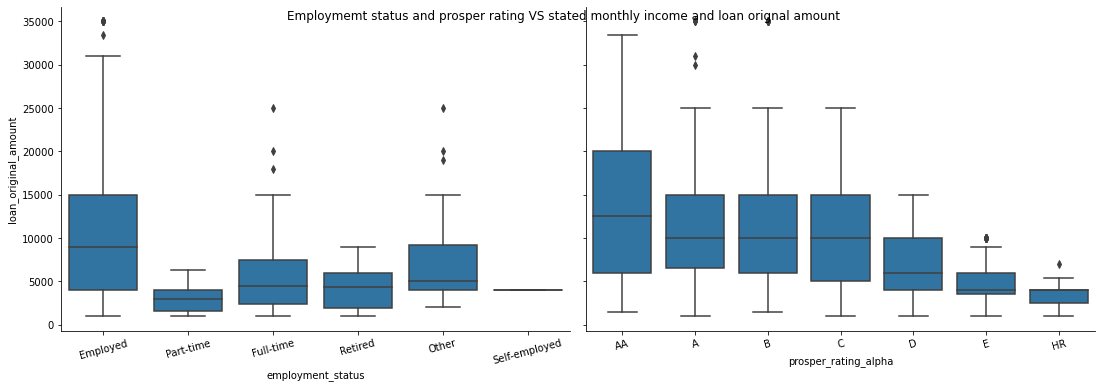

In [47]:
# can use a larger sample since there are fewer plots and they're simpler in nature.
categoric_vars_1 = ['employment_status', 'prosper_rating_alpha']
samples = loan_df.sample(2000, replace = False)

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """

    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)
    plt.xticks(rotation = 15)
    

plt.figure(figsize = [10, 8])
g = sb.PairGrid(data = samples, y_vars = [ 'loan_original_amount'], 
                x_vars = categoric_vars_1, size = 5, aspect = 1.5)

g.map(boxgrid);
plt.xticks(rotation = 15)
plt.suptitle('Employmemt status and prosper rating VS stated monthly income and loan orignal amount')
plt.show();

**How does income range affect loan amount**

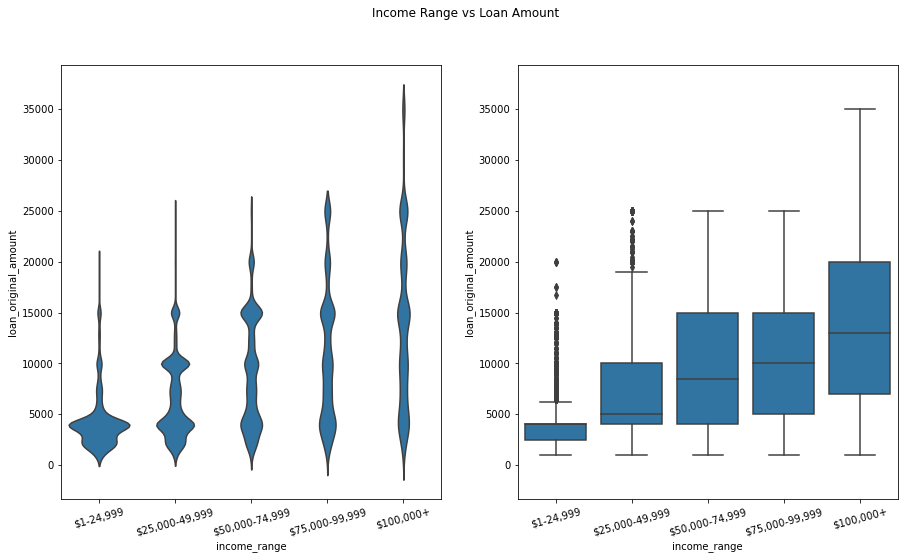

In [48]:
plt.figure(figsize = [15, 8])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = loan_df, x = 'income_range', y = 'loan_original_amount', color = base_color,inner=None)
plt.xticks(rotation = 15);

# right plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data = loan_df, x = 'income_range', y = 'loan_original_amount', color = base_color)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot
plt.xticks(rotation = 15);
plt.suptitle('Income Range vs Loan Amount');

### Categorical vs categorical visuals
 **lets check the loan status of borrowers with respect to their employment status**

Text(0.5, 1.0, 'Count of Applicants LoanStatus vs Employment status')

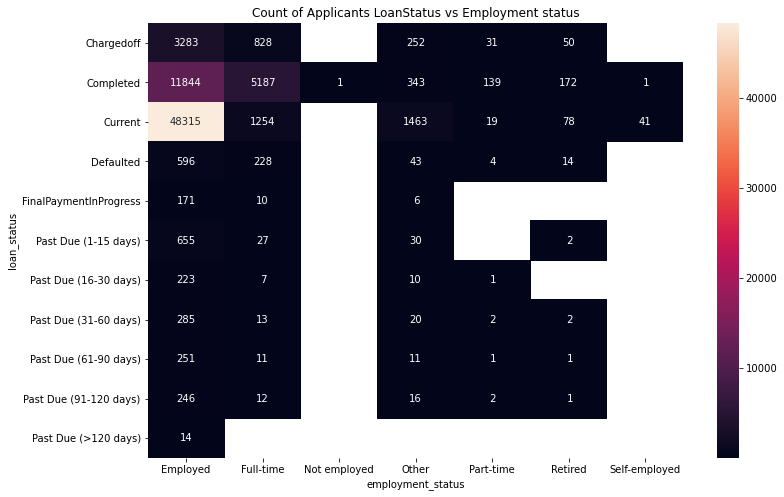

In [49]:
plt.figure(figsize = [12, 8])
ct_counts = loan_df.groupby(['employment_status', 'loan_status']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'loan_status', columns = 'employment_status', values = 'count')
sb.heatmap(ct_counts, annot = True,fmt='2g');
plt.title('Count of Applicants LoanStatus vs Employment status')

> you can vividly see that majority of employed applicants have their loan status current and completed followed by full time

### **taking the analysis further by looking at the comparism between applicant's loan status and if they own a home or not**

Text(0.5, 1.0, 'Count of Applicants LoanStatus and HomeownerStatus')

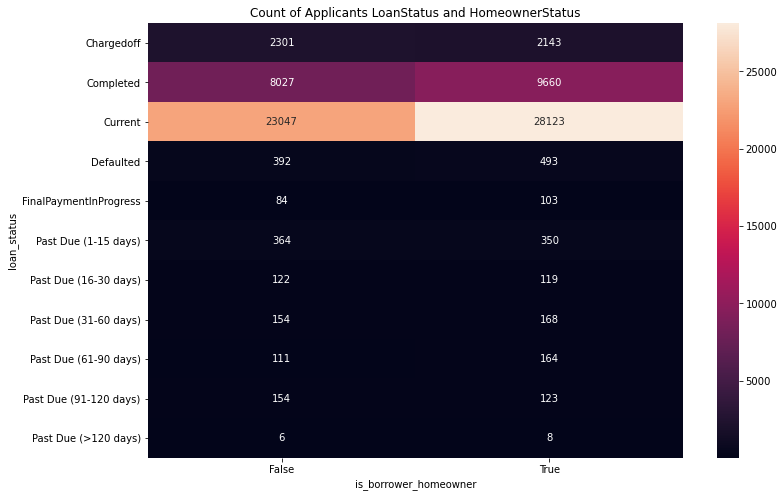

In [50]:

plt.figure(figsize = [12, 8])
ct_counts = loan_df.groupby(['is_borrower_homeowner', 'loan_status']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'loan_status', columns = 'is_borrower_homeowner', values = 'count')
sb.heatmap(ct_counts, annot = True, fmt = 'd');
plt.title('Count of Applicants LoanStatus and HomeownerStatus')

> majority of applicants that owns are home owners have their loan status current and completed

**Now Lets look at how some variables effect each other**

Text(0.5, 1.0, "Count of Applicant's prosper rating with respect to their employment status")

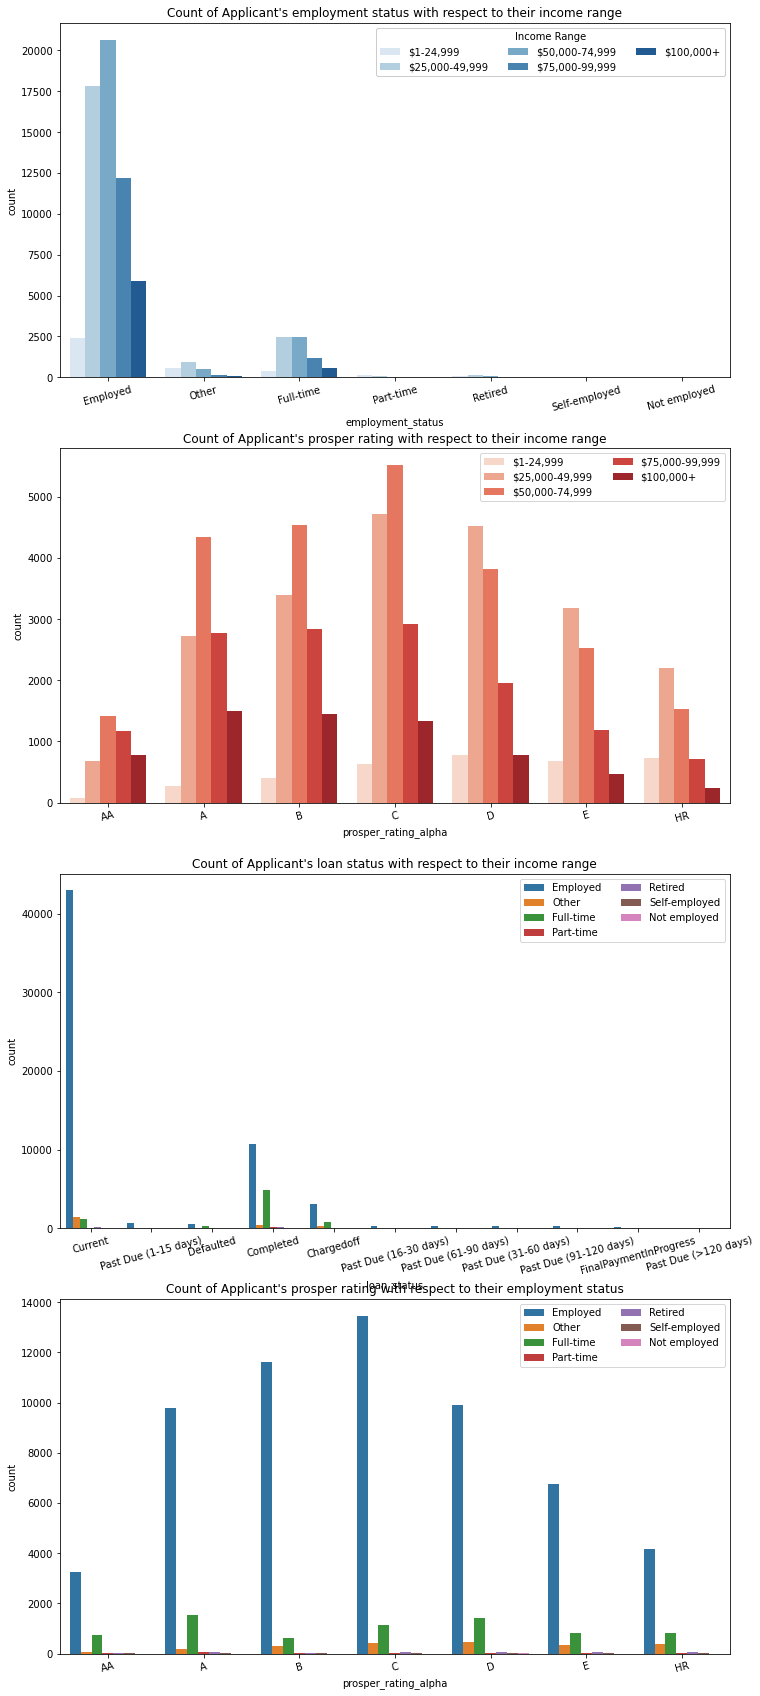

In [51]:
loan_df_sub = loan_df[(loan_df['stated_monthly_income'] <= 10000) ]
loan_df_sub = loan_df_sub[loan_df_sub['income_range'] != 'Not employed']
categoric_vars = ['employment_status', 'prosper_rating_alpha', 'income_range','loan_status']

plt.figure(figsize = [12, 30])

# subplot 1: employment status vs income range
ax1= plt.subplot(4, 1, 1)
ax1 = sb.countplot(data = loan_df_sub, x = 'employment_status', hue = 'income_range', palette = 'Blues')
plt.xticks(rotation = 15)
ax1.legend(loc = 1, ncol = 3, framealpha = 1, title= 'Income Range')
plt.title("Count of Applicant's employment status with respect to their income range")

# subplot 2: prosper rating vs. income range
ax2 = plt.subplot(4, 1, 2)
ax2 = sb.countplot(data = loan_df_sub, x = 'prosper_rating_alpha', hue = 'income_range', palette = 'Reds')
ax2.legend(ncol = 2) # re-arrange legend to reduce overlapping
plt.xticks(rotation = 15)
plt.title("Count of Applicant's prosper rating with respect to their income range")


# subplot 3: loan status vs. employment status, use different color palette
ax3 = plt.subplot(4, 1, 3)
ax3 = sb.countplot(data = loan_df_sub, x = 'loan_status', hue = 'employment_status')
ax3.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping
plt.xticks(rotation = 15)
plt.title("Count of Applicant's loan status with respect to their income range")

# subplot 2: prosper rating vs. employment status
ax4 = plt.subplot(4, 1, 4)
ax4 = sb.countplot(data = loan_df_sub, x = 'prosper_rating_alpha', hue = 'employment_status')
ax4.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping
plt.xticks(rotation = 15);
plt.title("Count of Applicant's prosper rating with respect to their employment status")

## insights gained from the bivariate explorations

- Majority of borrower in the AA prosper rating category are employed followed by Full-time. In general the number of employed borrowers are larger than any other employment category
- majority of the employed borrowers earned between 50K - 74,999K USD
- a large number of employed borrowers have their loan status as completed compared to counterparts 
- people with income range above $100K have the highest median loan orginal amount
- it can also be seen that people with stated monthly income with a median income of about `$500`  and with a prosper rating of AA employed

<a id="multi"></a>
## Multivariate Exploration
Relationship between numerical and categorical variables

**Dooes  income range and prosper rating determine loan orginal amount?**  

In [52]:
# lets us check for top 3 category AA,A,B in prosper rating varable
loan_df_sub2 = loan_df_sub.loc[loan_df_sub['prosper_rating_alpha'].isin(['AA', 'A','B'])]

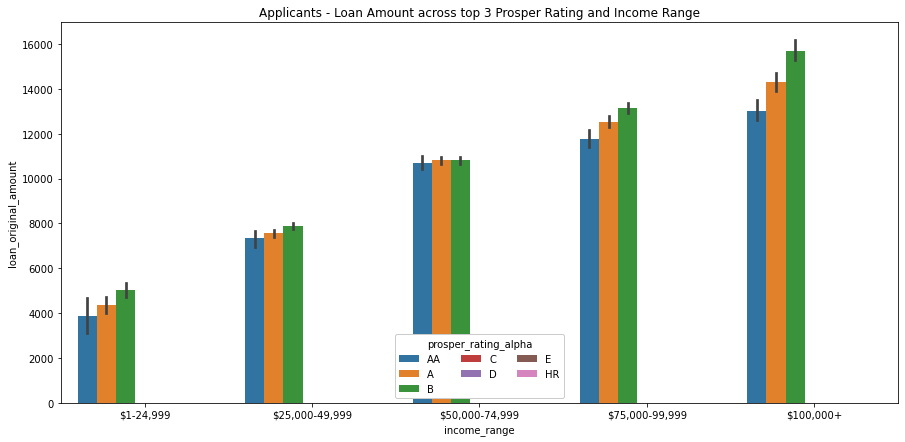

In [53]:
plt.figure(figsize = [15, 7])

ax = sb.barplot(data = loan_df_sub2, x = 'income_range', y = 'loan_original_amount', hue = 'prosper_rating_alpha')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'prosper_rating_alpha')
plt.title('Applicants - Loan Amount across top 3 Prosper Rating and Income Range');


**Does having a home and having a high monthly income increase loan amount?** 

c:\users\hp 7240\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


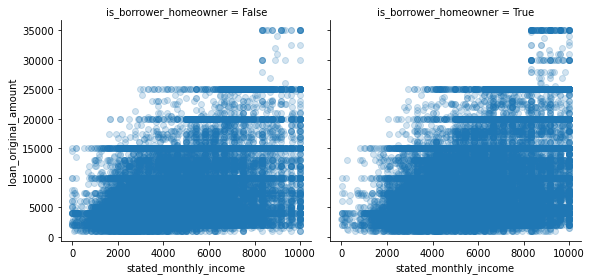

In [54]:
g = sb.FacetGrid(data = loan_df_sub, col= 'is_borrower_homeowner', size = 4,
                 col_wrap = 3)
g.map(sb.regplot, 'stated_monthly_income', 'loan_original_amount', y_jitter = 0.04, fit_reg = False,
      scatter_kws = {'alpha' : 1/5})

**Does having a home and employment status increase loan amount?** 

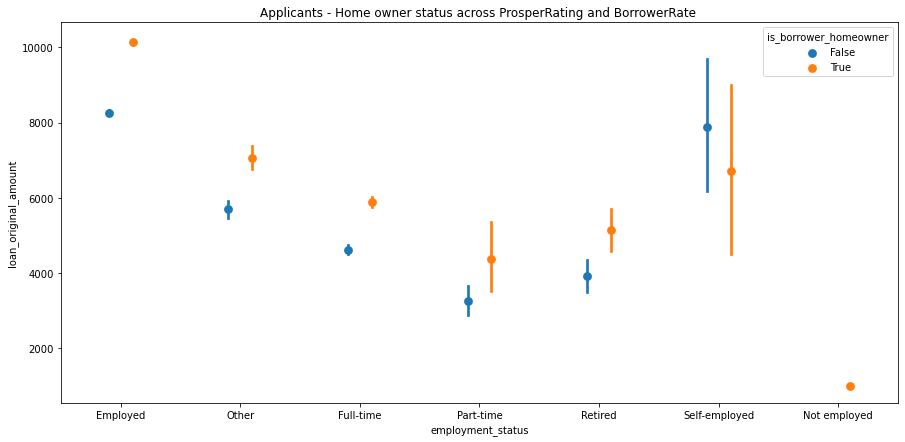

In [55]:
plt.figure(figsize = [15, 7])
ax = sb.pointplot(data = loan_df_sub, x = 'employment_status', y = 'loan_original_amount', hue = 'is_borrower_homeowner',
                  dodge = 0.2, linestyles = "");
plt.title('Applicants - Home owner status across ProsperRating and BorrowerRate ');

**Does having a home and high rating affect borrower's interest rate?**

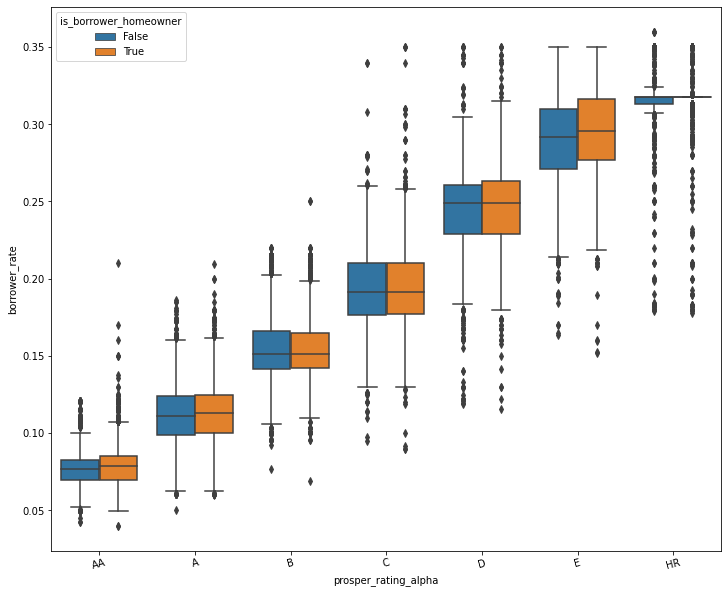

In [56]:
plt.figure(figsize=[12,10])
sb.boxplot(data = loan_df_sub, x = 'prosper_rating_alpha', y = 'borrower_rate',hue='is_borrower_homeowner')
plt.xticks(rotation = 15);

## quick insights from multivariate analysis.
- For browwers with prosper ratings from AA to B have the higher loan amount with increased salary
- more number borrowers with a home and have high stated monthly income got larger loan amount compared to the ones without a home.
- being employed and owning a home increases your chances of getting a large loan amount

<a id="summary"></a>
## Summary and Insights

- majority of the employed borrowers earned between 50K - 74,999K USD

- For browwers with prosper ratings from AA to B have the higher loan amount with increased salary

- The distribution of monthly income of applicants is a right skewed because there will be few applicants with high salary.

- being employed and owning a home increases your chances of getting a large loan amount

- We observe that applicants with high rating tends to have a low interest rate wether that person owns a home or not. as your rating decrease, your interest rate increase

<a id="conclusions"></a>
## Conclusion
To conclude this analysis , I say that the loan approval status is dependent on the applicant's information on IncomeRange, Homeownerstatus and employment status. which can be considered to be very true as it is very unlikely for unemployed individuals without collateral and doesn't have an income stream to get loan easily

In [57]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Explanatory.ipynb'])

0

<li><a href="#top">Back to the top</a></li>